<a href="https://colab.research.google.com/github/engSalah-dot/water-temperature-regression/blob/main/linear%20Regression%20using%20Pynomial%20Functions%20and%20Regularization%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso

Salnty    6
T_degC    1
dtype: int64
     Salnty  T_degC
0    33.440   10.50
1    33.440   10.46
2    33.437   10.46
3    33.420   10.45
4    33.421   10.45
..      ...     ...
495  34.269    4.90
496  34.310    4.50
497  34.311    4.48
498  34.319    4.21
499  34.329    3.95

[500 rows x 2 columns]
Salnty    0
T_degC    0
dtype: int64
(500, 1) (500, 1)


/tmp/ipython-input-16-3567214158.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_binary.fillna(method="ffill", inplace=True)


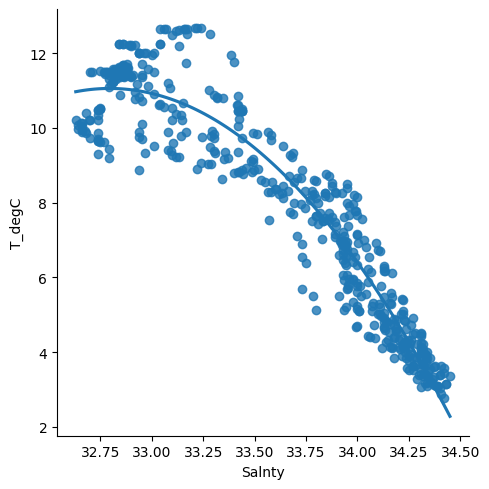

In [16]:
df = pd.read_csv('bottle.csv')
df_binary = df[['Salnty', 'T_degC']]
df_binary = df[['Salnty', 'T_degC']].iloc[:500]
print(df_binary.isnull().sum())
df_binary.fillna(method="ffill", inplace=True)
df_binary.dropna(inplace=True)
print(df_binary)
# Taking only the selected two attributes from the dataset
#display the first 5 rows
df_binary.head()
sns.lmplot(x ="Salnty", y ="T_degC", data = df_binary, order = 2, ci = None)
print(df_binary.isnull().sum())
print(X.shape, y.shape)

plt.show()

In [19]:
X=np.array(df_binary['Salnty']).reshape(-1,1)
y=np.array(df_binary['T_degC']).reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
lin = LinearRegression()
lin.fit(X, y)

poly=PolynomialFeatures(degree=4)
x_poly_train=poly.fit_transform(x_train)
x_poly_test=poly.fit_transform(x_test)


poly.fit(x_poly_train,y)

lin2=LinearRegression()
lin2.fit(x_poly_train,y_train)
print(X.shape, y.shape)



(500, 1) (500, 1)


(500, 1) (500, 1)


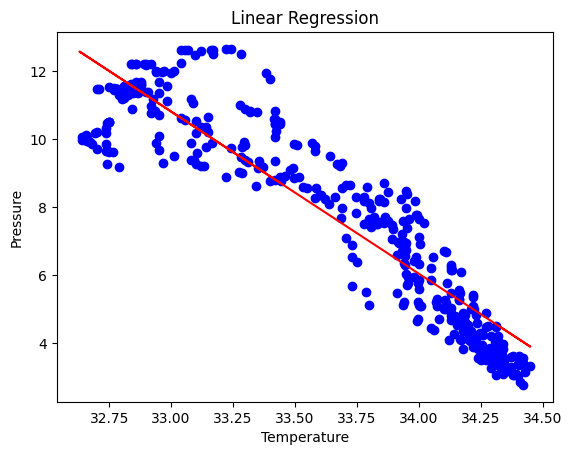

In [21]:
# Visualising the Linear Regression results
plt.scatter(x_train, y_train, color='blue')

plt.plot(X, lin.predict(X), color='red')
plt.title('Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
print(X.shape, y.shape)

plt.show()

(500, 1) (500, 1)


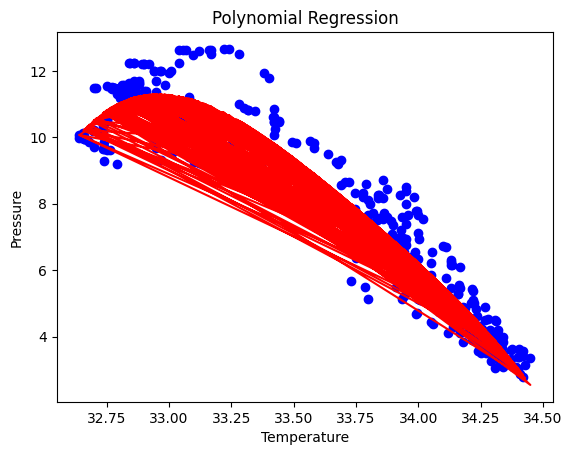

In [24]:
# Visualising the Polynomial Regression results
plt.scatter(x_train, y_train, color='blue')
print(X.shape, y.shape)

plt.plot(x_train, lin2.predict(x_poly_train),color='red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

plt.show()

In [ ]:
# Predicting a new result with Linear Regression
# after converting predict variable to 2D array
pred = 34
predarray = np.array([[pred]])
lin.predict(predarray)

array([[6.05031589]])

In [ ]:
# Predicting a new result with Polynomial Regression
# after converting predict variable to 2D array
pred2 = 34
pred2array = np.array([[pred2]])
lin2.predict(poly.fit_transform(pred2array))

array([[6.24697792]])

In [30]:
l=Lasso(alpha=0.1)
l.fit(x_train,y_train)
l.predict(x_test)
print(l.score(x_test,y_test))


0.8173042369642178


In [31]:
r=Ridge(alpha=0.1)
r.fit(x_train,y_train)
r.predict(x_test)
print(r.score(x_test,y_test))

0.8186920878991069
